In [18]:
import numpy as np
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from config import config

In [19]:
def read_mongo(collection, query={}):
    """ Read from Mongo and Store into DataFrame """

    # Make a query to the specific DB and Collection
    cursor = collection.find(query)
    
    elements = []
    for doc in cursor:
        del doc['_id']
        elements.append(doc)
        
    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(elements)
    
    return df

In [3]:
REPO = 'jabref/jabref'

In [20]:
mongoClient = pymongo.MongoClient(config['DATABASE']['CONNECTION_STRING'])
db = mongoClient[config['DATABASE']['NAME']]
collection = db[f'{REPO}_results']

lastIssue = collection.find().sort('number', -1).limit(1)[0]['number']

df = read_mongo(collection, {'number': {'$gte': lastIssue - 6000}})
df.head()

,data,repositorio,issue,arquivos,topk,tecnica,compare,filtros,arquivos_resolvidos_de_verdade,mapk,min_sim,max_sim,mediana_sim,acertos,erros,arquivos_sugeridos,number
0,2018-04-03T12:30:08Z,jabref/jabref,license of external libraries not exact enough,1,3,tfidf,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",[external-libraries.txt],0.000000,0.0,0.145595,0.000000,0,4,"[CHANGELOG.md, src/main/java/org/jabref/gui/co...",3897
1,2018-04-16T14:45:03Z,jabref/jabref,IEEE transitions to HTTPS,5,3,tfidf,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",[src/main/java/org/jabref/gui/importer/fetcher...,0.000000,0.0,0.000000,0.000000,0,4,"[external-libraries.txt, CHANGELOG.md, src/mai...",3930
2,2018-04-29T12:18:50Z,jabref/jabref,Add RFC Standard Fetcher,5,3,tfidf,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...","[CHANGELOG.md, src/main/java/org/jabref/logic/...",0.133333,0.0,0.218712,0.178891,1,18,"[CHANGELOG.md, src/main/java/net/sf/jabref/gui...",3971
3,2018-06-07T08:01:32Z,jabref/jabref,New Entry does no longer focus on first field ...,3,3,tfidf,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...","[CHANGELOG.md, src/main/java/org/jabref/gui/en...",0.000000,0.0,0.208895,0.203644,0,5,"[CHANGELOG, src/main/java/net/sf/jabref/Previe...",4024
4,2018-06-13T15:51:01Z,jabref/jabref,Groups are focused on right-click,1,3,tfidf,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",[src/main/java/org/jabref/gui/groups/GroupTree...,0.000000,0.0,0.224294,0.146922,0,4,"[CHANGELOG.md, src/main/java/org/jabref/gui/Ba...",4025


In [21]:
tfidf = df[(df['tecnica'] == 'tfidf') & ((df['topk'] == 3) | (df['topk'] == 5))]
sbert = df[(df['tecnica'] == 'sbert') & ((df['topk'] == 3) | (df['topk'] == 5))]
word2vec = df[(df['tecnica'] == 'word2vec') & ((df['topk'] == 3) | (df['topk'] == 5))]

<AxesSubplot: xlabel='topk', ylabel='mapk'>

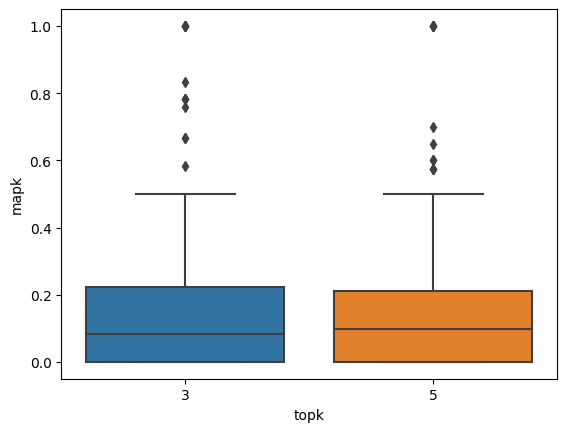

In [22]:
sns.boxplot(x=sbert["topk"], y=sbert["mapk"])

<AxesSubplot: xlabel='topk', ylabel='mapk'>

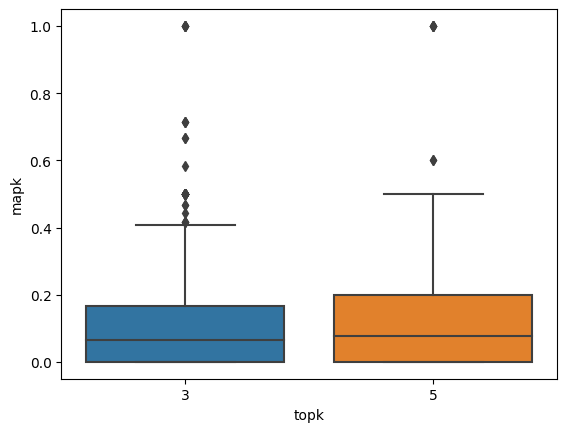

In [23]:
sns.boxplot(x=word2vec["topk"], y=word2vec["mapk"])

<AxesSubplot: xlabel='topk', ylabel='mapk'>

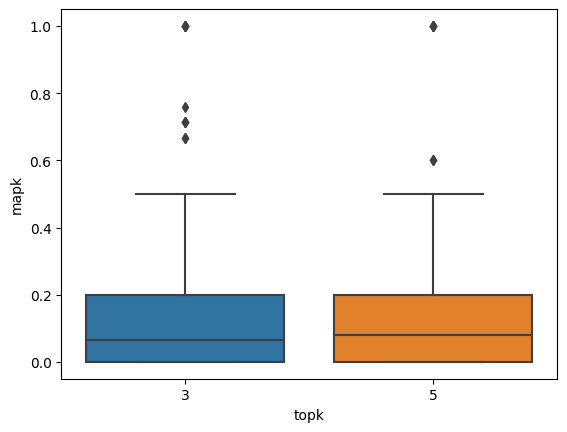

In [24]:
sns.boxplot(x=tfidf["topk"], y=tfidf["mapk"])

In [25]:
stats.kruskal(sbert[sbert['topk'] == 3]['mapk'], sbert[sbert['topk'] == 5]['mapk'])

KruskalResult(statistic=0.5279477988258312, pvalue=0.46747092753655006)

In [26]:
stats.kruskal(word2vec[word2vec['topk'] == 3]['mapk'], word2vec[word2vec['topk'] == 5]['mapk'])

KruskalResult(statistic=0.4245323827407403, pvalue=0.5146840937865627)

In [27]:
stats.kruskal(tfidf[tfidf['topk'] == 3]['mapk'], tfidf[tfidf['topk'] == 5]['mapk'])

KruskalResult(statistic=0.13759479024461793, pvalue=0.7106839215567189)